In [17]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [18]:
env=gym.make("CartPole-v1", render_mode="rgb_array")

In [19]:
# cart loc, cart vel, pole ang, pole ang vel
obs_low = np.array([-4.8, -5, -0.418, -5])
obs_high = np.array([4.8, 5, 0.418, 5])

In [29]:
n_bins = (12, 24, 12, 24)
bins = []
for i in range(len(n_bins)):
    bins.append(np.linspace(obs_low[i], obs_high[i], n_bins[i]-1))

In [30]:
def discretize(obs):
    discretized = []
    for i in range(len(obs)):
        d = np.digitize(obs[i], bins[i])
        discretized.append(d)
    return tuple(discretized)

In [31]:
n_actions = env.action_space.n
q_table = np.zeros(n_bins + (n_actions,))

In [38]:
alpha = 0.1
gamma = 1
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.999
n_episodes = 5000

Episode 0 Reward: 15.0
Episode 100 Reward: 17.0
Episode 200 Reward: 19.0
Episode 300 Reward: 32.0
Episode 400 Reward: 14.0
Episode 500 Reward: 40.0
Episode 600 Reward: 15.0
Episode 700 Reward: 29.0
Episode 800 Reward: 24.0
Episode 900 Reward: 18.0
Episode 1000 Reward: 39.0
Episode 1100 Reward: 15.0
Episode 1200 Reward: 180.0
Episode 1300 Reward: 56.0
Episode 1400 Reward: 235.0
Episode 1500 Reward: 21.0
Episode 1600 Reward: 99.0
Episode 1700 Reward: 31.0
Episode 1800 Reward: 112.0
Episode 1900 Reward: 210.0
Episode 2000 Reward: 199.0
Episode 2100 Reward: 151.0
Episode 2200 Reward: 177.0
Episode 2300 Reward: 287.0
Episode 2400 Reward: 206.0
Episode 2500 Reward: 227.0
Episode 2600 Reward: 215.0
Episode 2700 Reward: 258.0
Episode 2800 Reward: 154.0
Episode 2900 Reward: 141.0
Episode 3000 Reward: 125.0
Episode 3100 Reward: 247.0
Episode 3200 Reward: 116.0
Episode 3300 Reward: 214.0
Episode 3400 Reward: 169.0
Episode 3500 Reward: 500.0
Episode 3600 Reward: 500.0
Episode 3700 Reward: 500.0
Ep

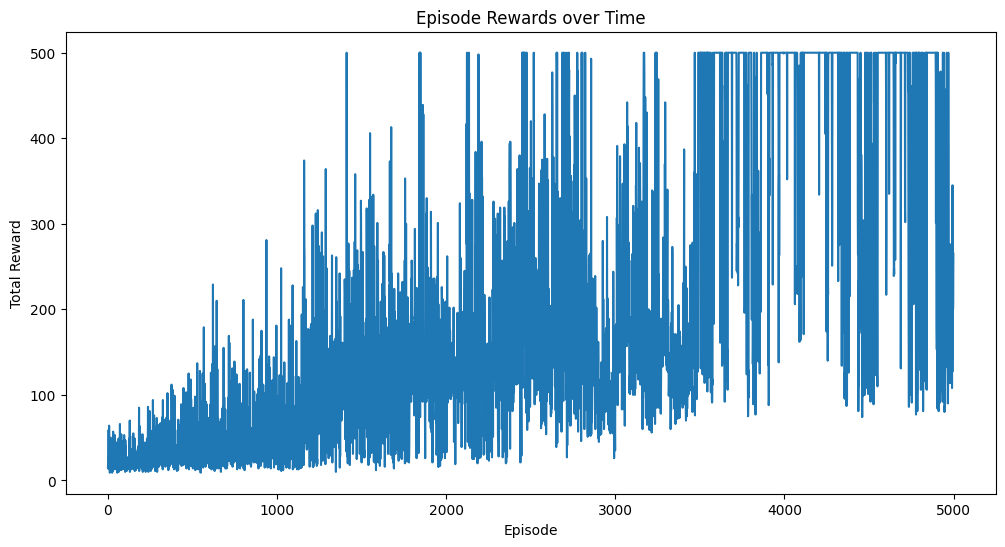

In [39]:
rewards_per_episode = []

for episode in range(n_episodes):
    state, _ = env.reset()
    state_disc = discretize(state)
    total_reward = 0
    done = False
    
    while not done:
        if np.random.random() < epsilon:
            action = np.random.choice(n_actions)
        else:
            action = np.argmax(q_table[state_disc])
        
        next_state, reward, done, truncated, info = env.step(action)
        next_state_disc = discretize(next_state)
        
        best_next = np.max(q_table[next_state_disc])
        td_target = reward + gamma * best_next
        td_error = td_target - q_table[state_disc + (action,)]
        q_table[state_disc + (action,)] += alpha * td_error
        
        state_disc = next_state_disc
        total_reward += reward
        
        if done or truncated:
            break
    
    epsilon = max(epsilon * epsilon_decay, epsilon_min)
    rewards_per_episode.append(total_reward)
    
    if episode % 100 == 0:
        print(f"Episode {episode} Reward: {total_reward}")

plt.figure(figsize=(12, 6))
plt.plot(rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Episode Rewards over Time")
plt.show()